# Avance 1

### Importancion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Lectura del dataset

In [2]:
data_latinoamerica = 'data_latinoamerica.csv'

df_dl = pd.read_csv(data_latinoamerica,parse_dates=['date']) # Lectura del archivo csv

#### Comprobacion de la cantidad de registros y columnas

In [5]:
# Muestra el número de filas y columnas (registros y columnas)
print(f"El dataset tiene {df_dl.shape[0]} registros y {df_dl.shape[1]} columnas.")


El dataset tiene 12216057 registros y 50 columnas.


#### Seleccionar los países donde se expandirán y el filtrado de fecha

In [25]:
# Muestra los valores unicos en las columnass
print(df_dl['country_name'].unique())
print(df_dl['country_code'].unique())
print(df_dl['location_key'].unique())

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']
['AR' 'BO' 'BR' 'CL' 'CO' 'CR' 'CU' 'DO' 'EC' 'GT' 'HN' 'MX' 'NI' 'PA'
 'PE' 'PR' 'PY' 'SV' 'UY' 'VE']
['AR' 'AR_A' 'AR_A_007' ... 'VE_X' 'VE_Y' 'VE_Z']


In [6]:
# Paises seleccionados para filtrar
countries_selected = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
countries_code_selected = ['AR', 'BR', 'CL', 'CO', 'MX', 'PE']

# Fecha seleccionada para filtrar
date_selected = '2021-01-01'

# Mascara para filtrar los paises seleccionados y la fecha
mask_country = df_dl['country_name'].isin(countries_selected)
mask_country_code = df_dl['location_key'].isin(countries_code_selected) # Se usa location_key para eliminar subregiones
mask_date = df_dl['date'].dt.strftime('%Y-%m-%d') >= date_selected

mask_def = mask_country & mask_country_code & mask_date

# Filtrar los paises seleccionados
df_countries_date = df_dl[mask_def]

print(df_countries_date['country_name'].unique())
print(df_countries_date['location_key'].unique())

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']
['AR' 'BR' 'CL' 'CO' 'MX' 'PE']


### Limpieza preliminar de datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario.

In [7]:
null_for_columns = df_countries_date.isnull().sum() # Muestra la cantidad de valores nulos por columna

print(null_for_columns)

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [9]:
# Variables de casos de covid
cases_covid = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered', 'cumulative_recovered']

# Variables de poblacion
population = ['population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density']

# Variables de edad
age_range = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Variables de salud
prevalence = ['smoking_prevalence', 'diabetes_prevalence',]

# Variables de mortalidad
expectancy = ['life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate']

#### Eliminacion de duplicados

In [10]:
df_countries_date.drop_duplicates()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
366,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253872,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253873,PE,2022-09-14,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253874,PE,2022-09-15,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253875,PE,2022-09-16,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN


### Eliminacion de filas y columnas completamente nulas

In [11]:
df_countries_date.dropna(axis=0, how='all')
df_countries_date.dropna(axis=1, how='all')

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
366,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253872,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253873,PE,2022-09-14,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253874,PE,2022-09-15,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253875,PE,2022-09-16,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN


In [29]:
null_for_columns = df_countries_date.isnull().sum()

print(null_for_columns)

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [28]:
df_countries_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 366 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float64       
 5   new_deceased                           3750 non-null   float64       
 6   cumulative_confirmed                   3750 non-null   float64       
 7   cumulative_deceased                    3750 non-null   float64       
 8   cumulative_vaccine_doses_administered  3750 non-null   float64       
 9   population                             3750 non-null   float64

###  Relleno de nulos

In [14]:
df_countries_date


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
366,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253872,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253873,PE,2022-09-14,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253874,PE,2022-09-15,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN
10253875,PE,2022-09-16,PE,Peru,NaN,NaN,NaN,NaN,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,NaN,NaN


#### Rellenado de nulo por dia anterior de cada pais

In [15]:
# Lista de columnas relacionadas con temperaturas y clima
columns_to_fill = ['average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity']

# Rellenar valores nulos con el valor del día anterior dentro de cada país
df_countries_date.loc[:, columns_to_fill] = df_countries_date.groupby('country_name')[columns_to_fill].ffill()

print(df_countries_date[columns_to_fill].isnull().sum())

average_temperature_celsius    0
minimum_temperature_celsius    0
maximum_temperature_celsius    0
rainfall_mm                    0
relative_humidity              0
dtype: int64


#### Rellenado de nulos por cero

In [16]:
columns_to_fill0 = ['new_confirmed', 'new_deceased', 'new_recovered']

# Rellenar covid con la mediana, se determino asi por si hay sesgo que sea hacia le centro de los datos
for column in columns_to_fill0:
    if column in df_countries_date.columns and column:
        df_countries_date.loc[:, column] = df_countries_date[column].fillna(0)

##### Relleno de nulos por el anterior

In [17]:
# Lista de columnas a rellenar
columns_to_fill = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']

# Rellenar valores nulos con el valor anterior
df_countries_date.loc[:, columns_to_fill] = df_countries_date[columns_to_fill].ffill()

##### Relleno de nulos por la resta de confirmados y fallecidos para recuperados

In [18]:
df_countries_date.loc[:, 'cumulative_recovered'] = df_countries_date['cumulative_recovered'].fillna(
    df_countries_date['cumulative_confirmed'] - df_countries_date['cumulative_deceased']
)

# Verificacion de todas las limpiezas de casos covid
print(df_countries_date[cases_covid].isnull().sum())

new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
new_recovered                            0
cumulative_recovered                     0
dtype: int64


In [27]:
print(df_countries_date.isnull().sum())

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

### Determinacion de variables claves

In [19]:
cases_covid = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered', 'cumulative_recovered']

population = ['population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density']

age_range = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

prevalence = ['smoking_prevalence', 'diabetes_prevalence',]

expectancy = ['life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate']

#### Calculos estadisticos


In [20]:
df_countries_date[cases_covid].describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,new_recovered,cumulative_recovered
count,3750.000000,3750.000000,3.750000e+03,3750.000000,3.750000e+03,3750.000000,3.750000e+03
mean,13846.620533,275.748000,6.786495e+06,192863.569600,8.447319e+07,8263.965600,6.447403e+06
std,24212.287393,507.204008,8.001193e+06,182912.085588,9.372252e+07,23037.778773,7.607564e+06
min,-573.000000,0.000000,9.710000e+02,1.000000,1.800000e+01,-31119.000000,9.700000e+02
25%,1511.000000,25.000000,2.130490e+06,59241.250000,1.976603e+07,0.000000,1.952028e+06
50%,5102.000000,98.000000,3.640786e+06,139614.000000,5.181511e+07,0.000000,3.476436e+06
75%,14802.500000,311.750000,6.247634e+06,215073.000000,1.053198e+08,1833.500000,6.107031e+06
max,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,282957.000000,3.388363e+07


In [21]:
df_countries_date[population].describe()

,population,population_male,population_female,population_rural,population_urban,population_density
count,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3750.000000
mean,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,34.266833
std,6.713774e+07,3.318493e+07,3.448406e+07,1.008074e+07,5.829528e+07,16.839471
min,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,16.515000
25%,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,25.431000
50%,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,25.734500
75%,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,45.861000
max,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,66.325000


In [22]:
df_countries_date[age_range].describe()

,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
count,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03
mean,1.205908e+07,1.263694e+07,1.265890e+07,1.202553e+07,9.932776e+06,7.993603e+06,5.442399e+06,2.964913e+06,1.451953e+06
std,9.755702e+06,1.034931e+07,1.082701e+07,1.098801e+07,9.359076e+06,7.666352e+06,5.270852e+06,2.702992e+06,1.252169e+06
min,2.428079e+06,2.493879e+06,2.995538e+06,2.945404e+06,2.578404e+06,2.352271e+06,1.791787e+06,9.931260e+05,5.377210e+05
25%,5.140624e+06,5.035905e+06,4.895056e+06,4.379777e+06,3.660378e+06,2.772568e+06,1.846407e+06,1.078066e+06,5.731030e+05
50%,7.066513e+06,7.582694e+06,7.638860e+06,6.793724e+06,5.478956e+06,4.727962e+06,3.342804e+06,1.898659e+06,9.698185e+05
75%,2.157586e+07,2.196605e+07,1.868045e+07,1.676378e+07,1.293796e+07,8.959656e+06,5.433731e+06,3.119417e+06,1.502231e+06
max,2.907691e+07,3.116045e+07,3.410464e+07,3.447676e+07,2.946201e+07,2.442120e+07,1.689686e+07,8.801551e+06,4.159027e+06


In [23]:
df_countries_date[prevalence].describe()

,smoking_prevalence,diabetes_prevalence
count,3750.000000,3750.000000
mean,16.883333,8.733333
std,10.702271,2.578241
min,4.800000,5.900000
25%,9.000000,6.600000
50%,13.950000,8.000000
75%,21.800000,10.400000
max,37.800000,13.500000


In [24]:
df_countries_date[expectancy].describe()

,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,76.808500,154.274667,81.428000,36.566667,14.816667
std,1.597394,27.000140,11.800621,13.027566,1.665972
min,74.992000,107.669000,59.035000,25.300000,12.400000
25%,75.672000,146.370000,77.999000,26.600000,12.600000
50%,76.518000,149.351000,82.149000,33.300000,15.750000
75%,77.109000,184.379000,91.421000,37.000000,15.800000
max,80.042000,188.528000,95.815000,63.900000,16.600000


###  Guardado de datos en DatosFinalesFiltrados.csv

In [30]:
df_countries_date.to_csv('DatosFinalesFiltrados.csv', index=False, sep=';')

### Carga del nuevo dataset

In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('DatosFinalesFiltrados.csv', delimiter=';')

In [33]:
# Convertir la columna date a datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir las columnas float64 a tipo float32
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    df[col] = df[col].astype('float32')

# Convertir las columnas int64 a tipo int32
int_columns = df.select_dtypes(include=['int64']).columns

for col in int_columns:
    df[col] = df[col].astype('int32')

df

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1616345.0
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1623946.0
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1628723.0
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1642519.0
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1656444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3746,PE,2022-09-14,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3747,PE,2022-09-15,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3748,PE,2022-09-16,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float32       
 5   new_deceased                           3750 non-null   float32       
 6   cumulative_confirmed                   3750 non-null   float32       
 7   cumulative_deceased                    3750 non-null   float32       
 8   cumulative_vaccine_doses_administered  3750 non-null   float32       
 9   population                             3750 non-null   float32 

### Utilizacion de for y/o while para calculos estadisticos

In [35]:
# Bucle for para calcular las estadísticas
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int32', 'int64'])
result_for = {}

for column in numeric_columns.columns:
    result_for[column] = {
        'media': df[column].mean(),
        'mediana': df[column].median(),
        'desviacion_estandar': df[column].std(),
        'minimo': df[column].min(),
        'maximo': df[column].max(),
        'rango': (df[column].max()-df[column].min()),
        'varianza': df[column].var(),
        '25%': df[column].quantile(0.25),
        '50%': df[column].quantile(0.50),
        '75%': df[column].quantile(0.75)
    }

for column, stats in result_for.items():
    print(f"Estadísticas para {column}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.2f}")
    print("\n")

Estadísticas para new_confirmed:
media: 13846.62
mediana: 5102.00
desviacion_estandar: 24212.29
minimo: -573.00
maximo: 298408.00
rango: 298981.00
varianza: 586234880.00
25%: 1511.00
50%: 5102.00
75%: 14802.50


Estadísticas para new_deceased:
media: 275.75
mediana: 98.00
desviacion_estandar: 507.20
minimo: 0.00
maximo: 11447.00
rango: 11447.00
varianza: 257255.91
25%: 25.00
50%: 98.00
75%: 311.75


Estadísticas para cumulative_confirmed:
media: 6786495.50
mediana: 3640785.50
desviacion_estandar: 8001193.00
minimo: 971.00
maximo: 34568832.00
rango: 34567860.00
varianza: 64019088015360.00
25%: 2130489.75
50%: 3640785.50
75%: 6247634.00


Estadísticas para cumulative_deceased:
media: 192863.58
mediana: 139614.00
desviacion_estandar: 182912.08
minimo: 1.00
maximo: 685203.00
rango: 685202.00
varianza: 33456830464.00
25%: 59241.25
50%: 139614.00
75%: 215073.00


Estadísticas para cumulative_vaccine_doses_administered:
media: 84473192.00
mediana: 51815112.00
desviacion_estandar: 93722520.00


In [36]:
# bucle while con True para calcular las estadísticas
i = 0
while True:
    if i >= len(df.columns):
        break
    
    column_current = df.columns[i]
    if df[column_current].dtype in ['float64', 'float32', 'int64', 'int32']:
        print(column_current)
        print(f'''
            media: {df[column_current].mean():.2f}
            mediana: {df[column_current].median():.2f}
            desviacion_estandar: {df[column_current].std():.2f}
            minimo: {df[column_current].min():.2f}
            maximo: {df[column_current].max():.2f}
            rango: {(df[column_current].max() - df[column_current].min()):.2f}
            varianza: {df[column_current].var():.2f}
            25%: {df[column_current].quantile(0.25):.2f}
            50%: {df[column_current].quantile(0.50):.2f}
            75%: {df[column_current].quantile(0.75):.2f}
        ''')
        print('------------------------------------------------')
    
    i += 1


new_confirmed

            media: 13846.62
            mediana: 5102.00
            desviacion_estandar: 24212.29
            minimo: -573.00
            maximo: 298408.00
            rango: 298981.00
            varianza: 586234880.00
            25%: 1511.00
            50%: 5102.00
            75%: 14802.50
        
------------------------------------------------
new_deceased

            media: 275.75
            mediana: 98.00
            desviacion_estandar: 507.20
            minimo: 0.00
            maximo: 11447.00
            rango: 11447.00
            varianza: 257255.91
            25%: 25.00
            50%: 98.00
            75%: 311.75
        
------------------------------------------------
cumulative_confirmed

            media: 6786495.50
            mediana: 3640785.50
            desviacion_estandar: 8001193.00
            minimo: 971.00
            maximo: 34568832.00
            rango: 34567860.00
            varianza: 64019088015360.00
            25%: 213048

### Creacion de funcion para obtener mediana, varianza y rango

In [37]:
def analyze_column_stats(df, column_name):
    # Verificar si la columna existe en el DataFrame
    if column_name not in df.columns:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")

    column_data = df[column_name]
    stats = {
        'mediana': column_data.median(),
        'varianza': column_data.var(),
        'rango': column_data.max() - column_data.min()
    }
    return stats

# Ejemplo de uso
column_stats = analyze_column_stats(df, 'population')
print(f'***Estadísticas para la columna population***\nMediana: {column_stats["mediana"]:.2f}\nVarianza: {column_stats["varianza"]:.2f}\nRango: {column_stats["rango"]:.2f}')

***Estadísticas para la columna population***
Mediana: 47910800.00
Varianza: 4507476372226048.00
Rango: 194985408.00


# Avance 2

### Importación de las librerias a utilizar, archivo CSV y verificación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DatosFinalesFiltrados.csv', delimiter=';')

# Convertir la columna date a datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir las columnas float64 a tipo float32
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    df[col] = df[col].astype('float32')

df

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1616345.0
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1623946.0
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1628723.0
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1642519.0
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1656444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3746,PE,2022-09-14,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3747,PE,2022-09-15,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3748,PE,2022-09-16,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float32       
 5   new_deceased                           3750 non-null   float32       
 6   cumulative_confirmed                   3750 non-null   float32       
 7   cumulative_deceased                    3750 non-null   float32       
 8   cumulative_vaccine_doses_administered  3750 non-null   float32       
 9   population                             3750 non-null   float32 

### Calculo de medidas de tendencia central, dispersión y correlaciones entre las variables

In [4]:
# Variables claves
cases_covid = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered', 'cumulative_recovered']

population = ['population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density']

age_range = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

prevalence = ['smoking_prevalence', 'diabetes_prevalence',]

expectancy = ['life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate']

In [5]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print('-'*40)

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
----------------------------------------
date
count                             3750
mean     2021-11-08 23:59:59.999999744
min                2021-01-01 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-09 00:00:00
75%                2022-04-14 00:00:00
max                2022-09-17 00:00:00
Name: date, dtype: object
----------------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
----------------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
----------------------------------------
new_confirmed
count      3750.000000
mean      13846.621094
std       24212.287109
min        -573.000000
25%        1511.000000
50%        5102.000000
75%       14802.500000
max      298408.

In [6]:
df_covid = df[cases_covid]
correlation = df_covid.corr()

print(f'''
CORELACION ENTRE VARIABLES
      {correlation}
{'-'*40}''')


CORELACION ENTRE VARIABLES
                                             new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.524107   
new_deceased                                0.524107      1.000000   
cumulative_confirmed                        0.427074      0.189735   
cumulative_deceased                         0.395633      0.265997   
cumulative_vaccine_doses_administered       0.248050     -0.071803   
new_recovered                               0.646853      0.537792   
cumulative_recovered                        0.402859      0.165501   

                                       cumulative_confirmed  \
new_confirmed                                      0.427074   
new_deceased                                       0.189735   
cumulative_confirmed                               1.000000   
cumulative_deceased                                0.904844   
cumulative_vaccine_doses_administered              0.765513   
new_recovered              

### Visualización de datos

#### Histogramas

#### Casos nuevos

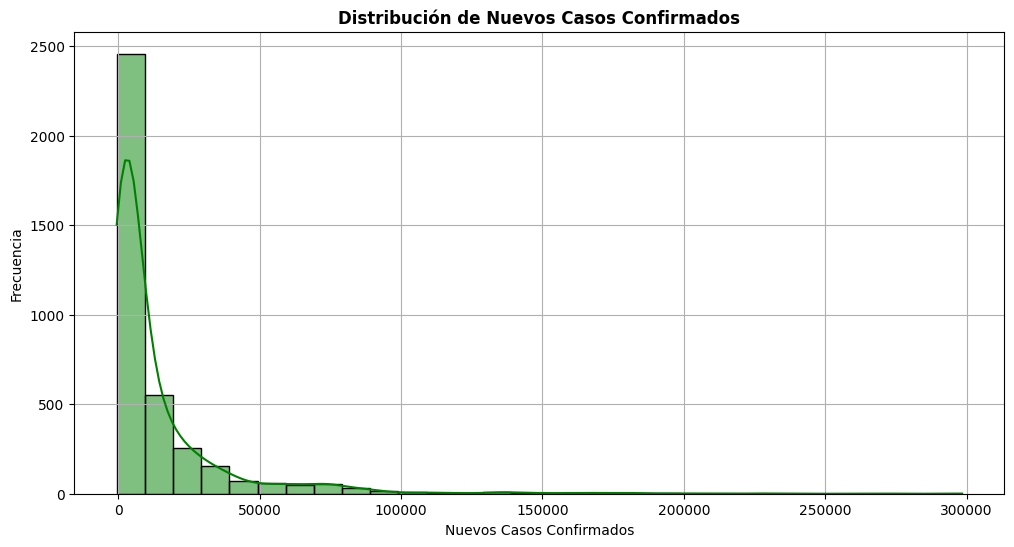

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['new_confirmed'], bins=30, kde=True, alpha=0.5, color='green')
'''
    df['new_confirmed']: Columna que contiene los datos nuevos confirmados
    bins=30: Establece el número de intervalos en el histograma
    kde=True: Añade la curva de densidad
    alpha=0.5: Hace que el color sea un poco transparente
    color='purple': Establece el color del histograma
'''
plt.title('Distribución de Nuevos Casos Confirmados', fontweight='bold')
plt.xlabel('Nuevos Casos Confirmados')
plt.ylabel('Frecuencia')

plt.grid(True)
plt.show()

### Dosis adminitradas

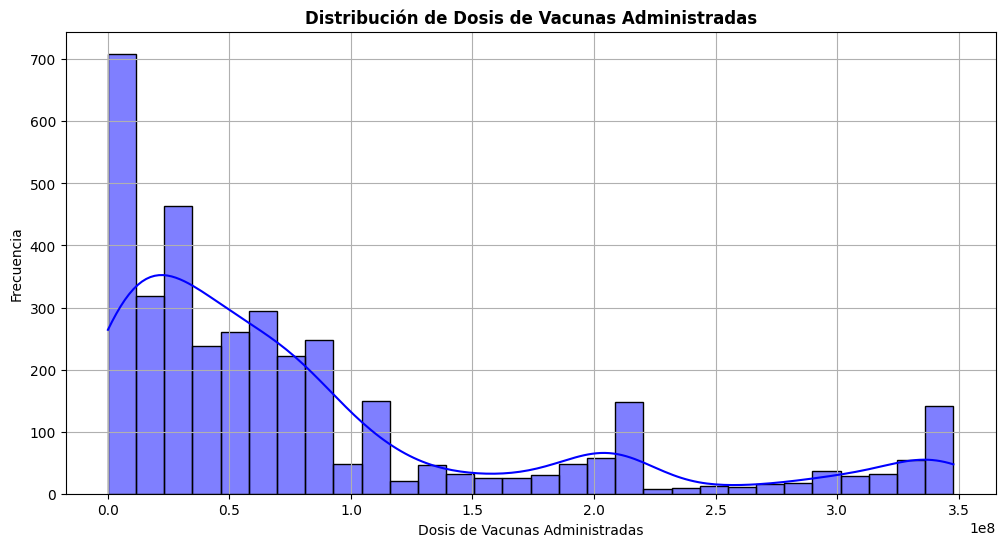

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['cumulative_vaccine_doses_administered'], bins=30, kde=True, alpha=0.5, color='blue')
'''
    df['cumulative_vaccine_doses_administered']: Columna que contiene los datos de dosis de vacunas administradas
    bins=30: Establece el número de intervalos en el histograma
    kde=True: Añade la curva de densidad
    alpha=0.5: Hace que el color sea un poco transparente
    color='blue': Establece el color del histograma
'''
plt.title('Distribución de Dosis de Vacunas Administradas', fontweight='bold')
plt.xlabel('Dosis de Vacunas Administradas')
plt.ylabel('Frecuencia')

plt.grid(True)
plt.show()

### Graficos de dispercion Correlacion entre Variables

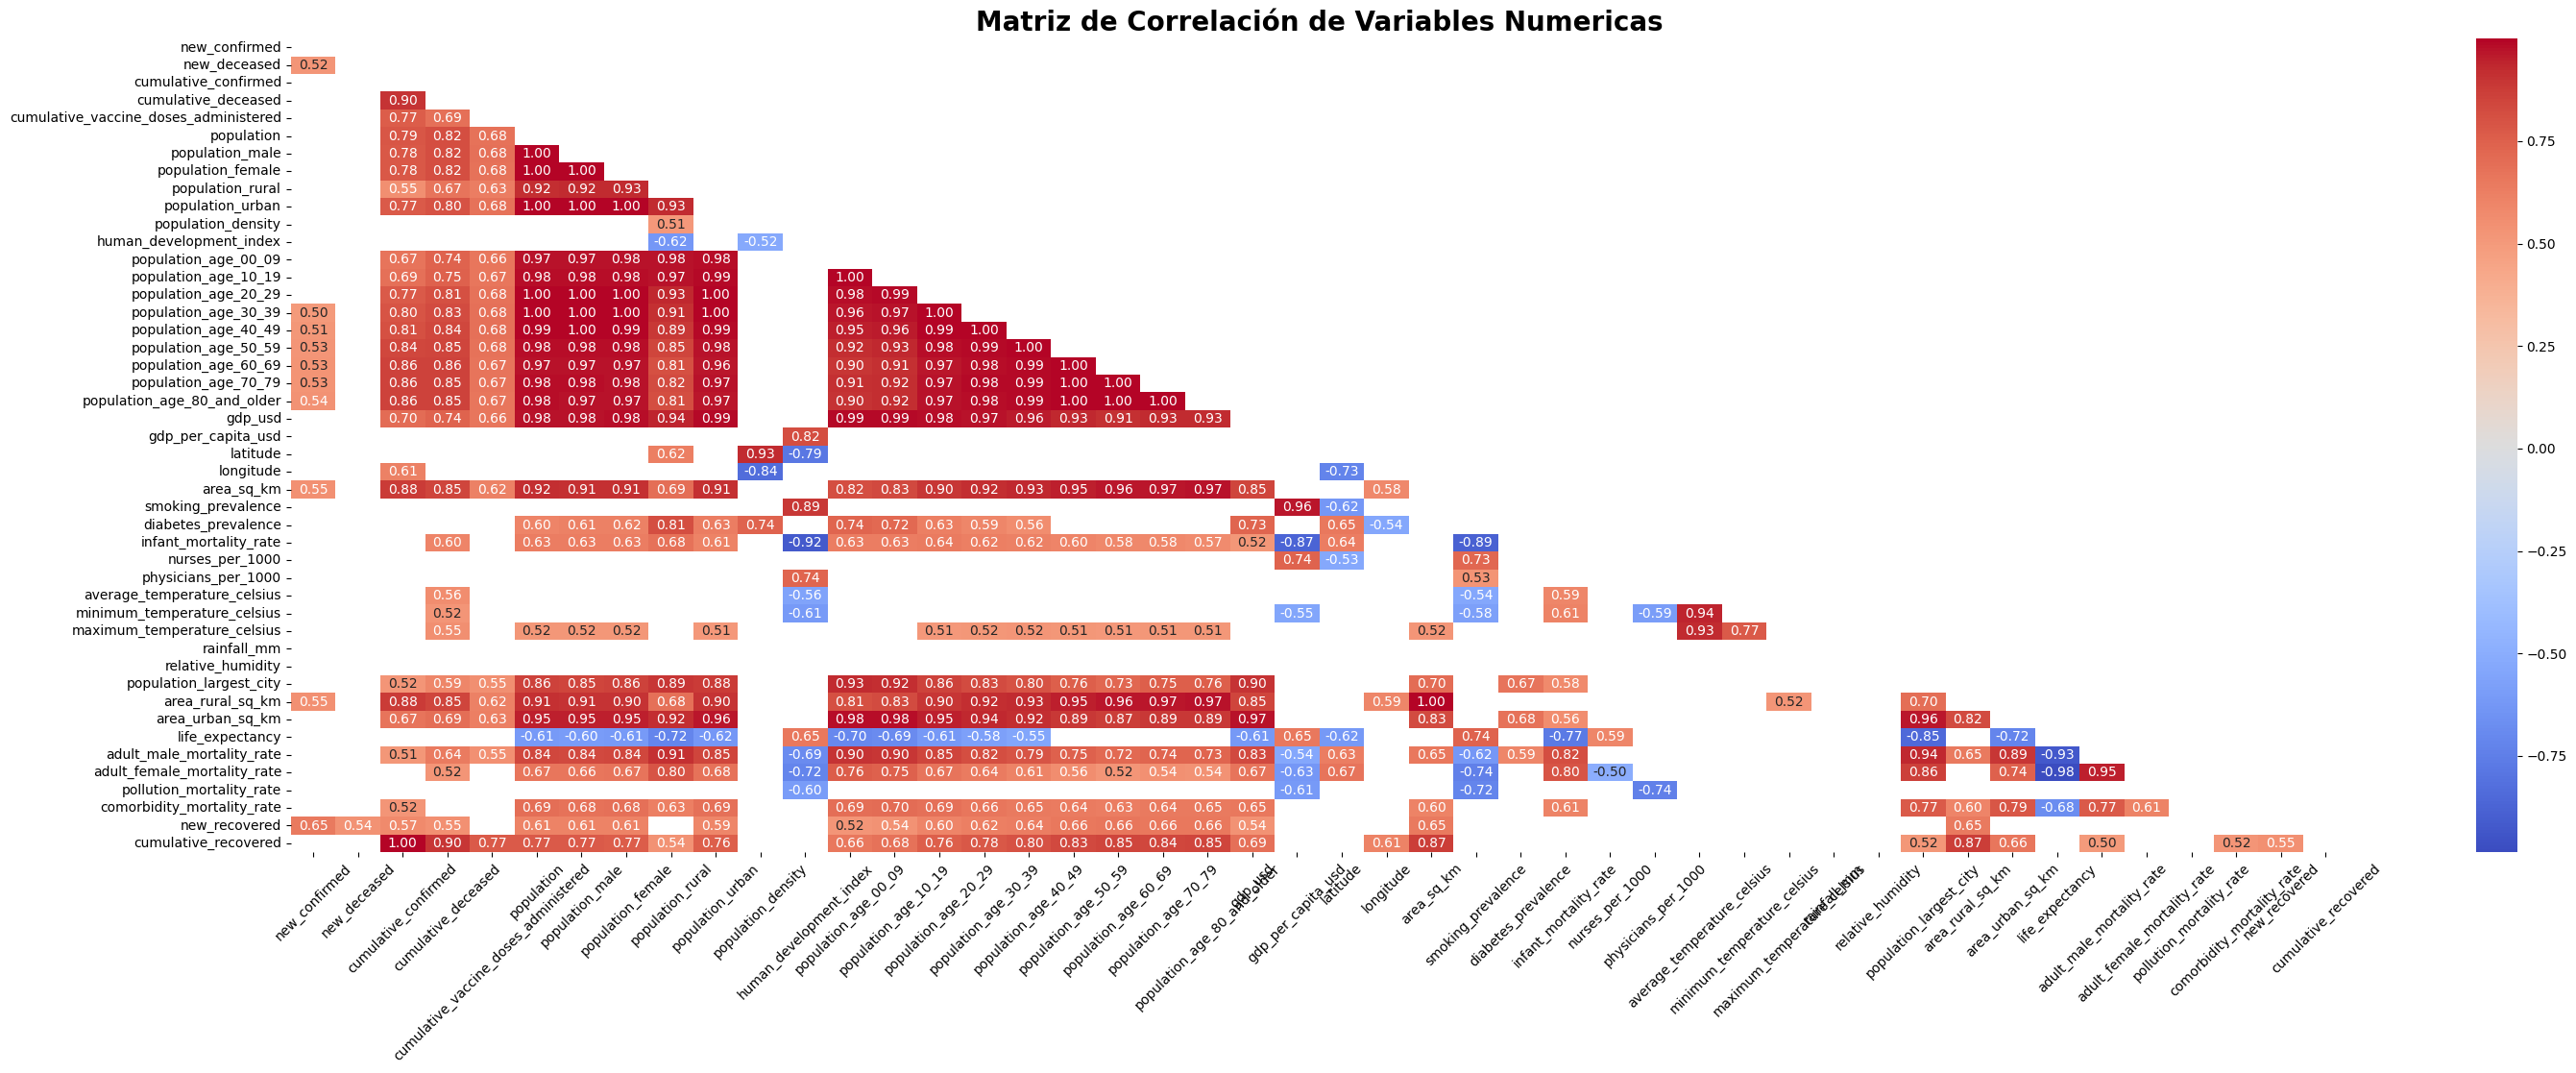

In [9]:
# Creacion de matriz para variables numericas
columns_numeric = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
correlation_matrix = df[columns_numeric].corr()

# Crear una máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Se van a mostrr valores mayores a 0.5, pero se pueden mostrar valores negativos
correlation_matrix = correlation_matrix[abs(correlation_matrix) > 0.5]

plt.figure(figsize=(30, 12))
headmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
'''
    correlation_matrix: Matriz de correlación que se va a graficar
    mask: Máscara para ocultar la parte superior de la matriz
    annot=True: Añade los valores numéricos en cada celda
    fmt=".2f": Formato de los números (dos decimales)
    cmap='coolwarm': Mapa de colores para la visualización
'''

plt.title('Matriz de Correlación de Variables Numericas', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Graficos de barra por region   

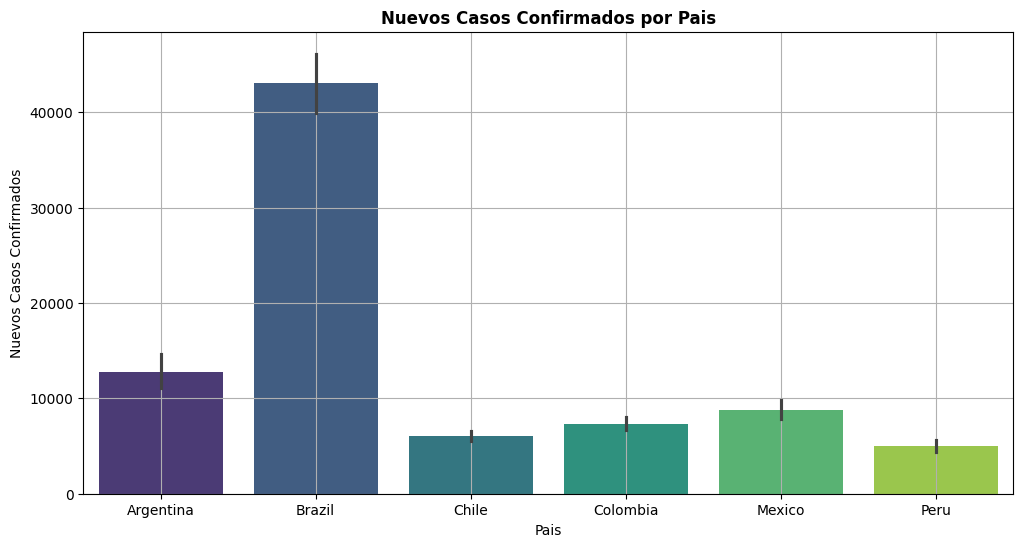

In [11]:
plt.figure(figsize=(12, 6))

sns.barplot(x='country_name', y='new_confirmed', hue='country_name', data=df, estimator=np.mean, palette='viridis', legend=False)

'''
    x='country_name': Columna para el eje x
    y='new_confirmed': Columna para el eje y
    hue='country_name': Columna para el color de las barras
    data=df: DataFrame de entrada
    estimator=np.mean: Estimador para calcular la media
    palette='viridis': Paleta de colores
    legend=False: No mostrar leyenda
'''

plt.title ('Nuevos Casos Confirmados por Pais', fontweight='bold')
plt.xlabel('Pais')
plt.ylabel('Nuevos Casos Confirmados')

plt.grid()
plt.show()

### Graficos de Calor por variables

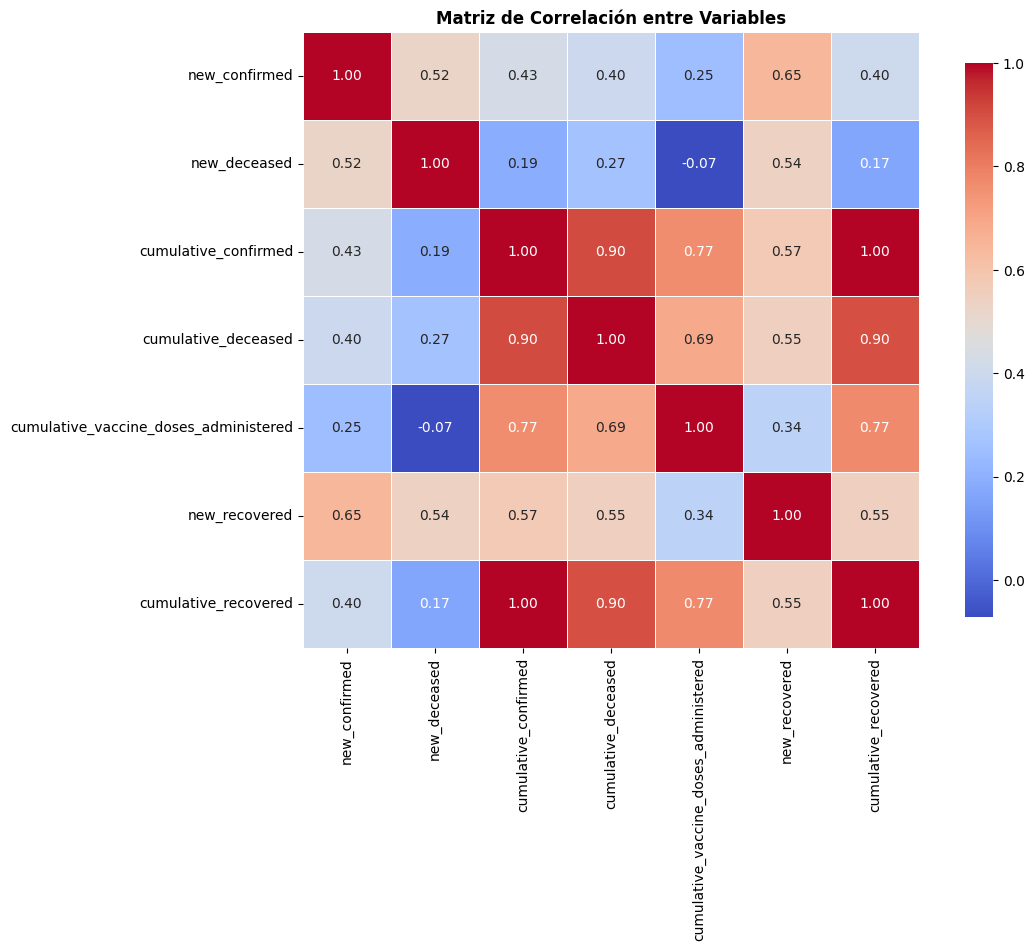

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .9}, square=True, fmt=".2f")
'''
    correlation: Es la matriz que se creo anteriormete y la vamos a visualizar
    annot=true: Indica que se mostrarán los valores en las celdas
    cmap='coolwarm': Establece el esquema de colores del mapa de calor
    linewidths=0.5: Establece el ancho de las líneas que separan las celdas
    cbar_kws={"shrink": .9}: Ajusta el tamaño de la barra de color
    square=True: Hace que las celdas sean cuadradas
    fmt=".2f": Indica que los números deben ser mostrados con dos decimales
'''
plt.title('Matriz de Correlación entre Variables', fontweight='bold')

plt.show()

### Graficos de dispersion

#### Relacion entre temperatura media y nuevos casos confirmados

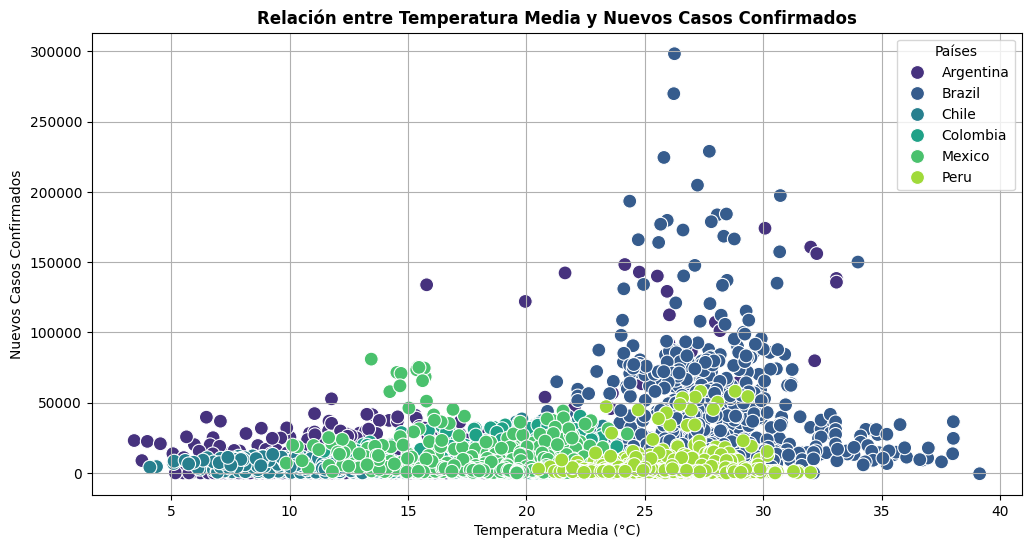

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='viridis', s=100)
'''
    data=df: DataFrame de entrada
    x='average_temperature_celsius': Columna para el eje x
    y='new_confirmed': Columna para el eje y
    hue='country_name': Columna para el color de los puntos
    palette='plasma': Paleta de colores
    s=100: Tamaño de los puntos
'''

plt.title('Relación entre Temperatura Media y Nuevos Casos Confirmados', fontweight='bold')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Casos Confirmados')

plt.legend(title='Países')
plt.grid(True)
plt.show()

#### Relacion entre temperatura Media y nuevas muertes confirmadas


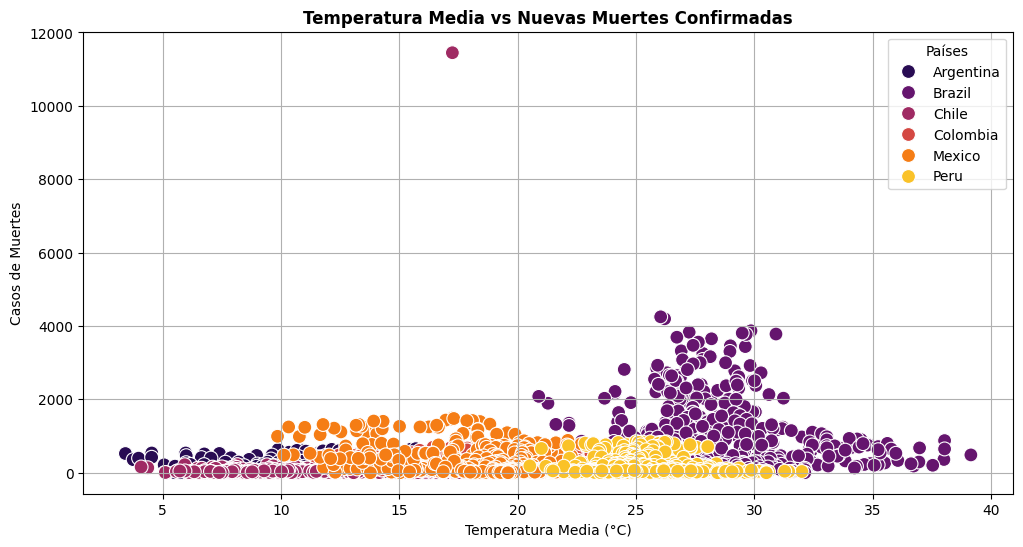

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_deceased', hue='country_name', palette='inferno', s=100)

'''
    data=df: DataFrame de entrada
    x='average_temperature_celsius': Columna para el eje x
    y='new_deceased': Columna para el eje y
    hue='country_name': Columna para el color de los puntos
    palette='cividis': Paleta de colores
    s=100: Tamaño de los puntos
'''
plt.title('Temperatura Media vs Nuevas Muertes Confirmadas', fontweight='bold')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Casos de Muertes')

plt.legend(title='Países')
plt.grid(True)
plt.show()

### Graficos de lineas

#### Evolucion de dosis administradas en cada pais a lo de largo de meses

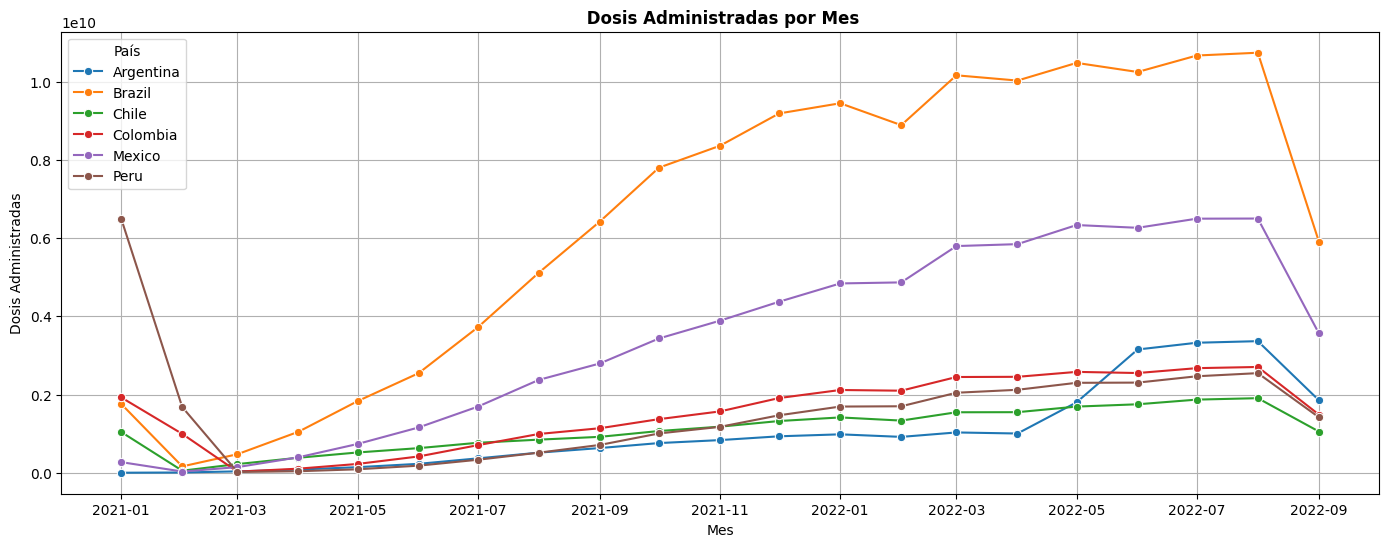

In [20]:
dose_per_month = df.groupby(['country_name', df['date'].dt.to_period('M')])['cumulative_vaccine_doses_administered'].sum().reset_index()
dose_per_month['date'] = dose_per_month['date'].dt.to_timestamp()

plt.figure(figsize=(17, 6))
sns.lineplot(data=dose_per_month, x='date', y='cumulative_vaccine_doses_administered', hue='country_name', marker='o')
'''
    data=dose_per_month: DataFrame de entrada
    x='date': Columna para el eje x
    y='cumulative_vaccine_doses_administered': Columna para el eje y
    hue='country_name': Columna para el color de las líneas
    marker='o': Establece el marcador para los puntos de datos
'''

plt.title(' Dosis Administradas por Mes', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')

plt.legend(title='País')
plt.grid(True)
plt.show()

#### Muertes por mes en cada pais

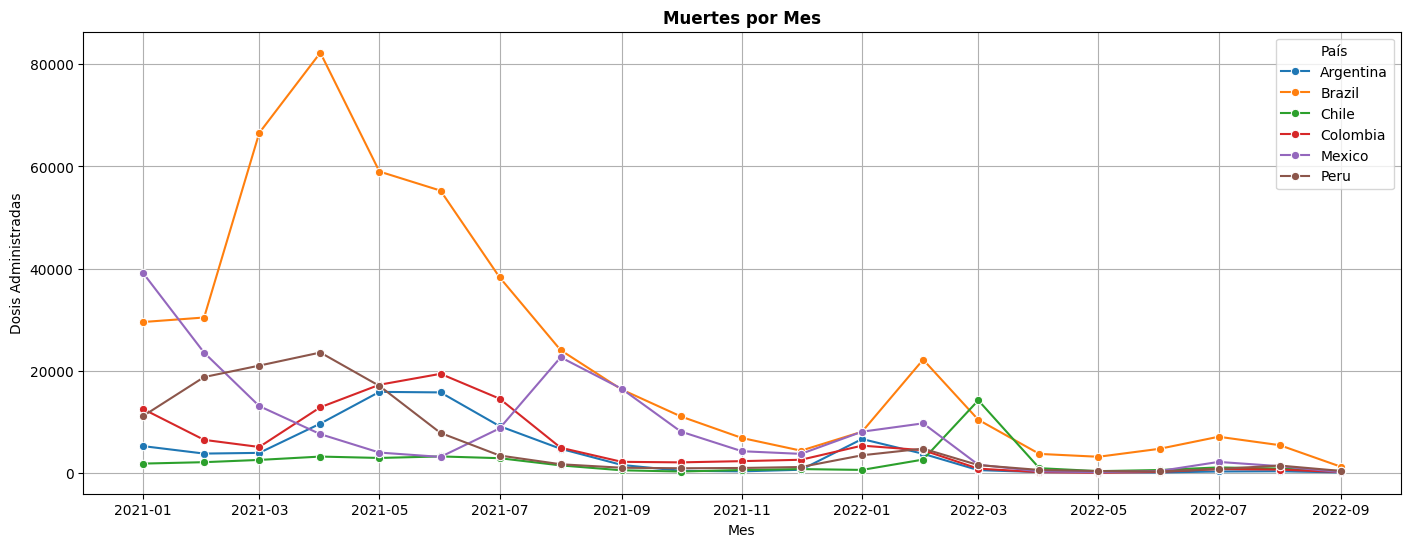

In [21]:
deceased_per_month = df.groupby(['country_name', df['date'].dt.to_period('M')])['new_deceased'].sum().reset_index()
deceased_per_month['date'] = deceased_per_month['date'].dt.to_timestamp()

plt.figure(figsize=(17, 6))
sns.lineplot(data=deceased_per_month, x='date', y='new_deceased', hue='country_name', marker='o')
'''
    data=deceased_per_month: DataFrame de entrada
    x='date': Columna para el eje x
    y='new_deceased': Columna para el eje y
    hue='country_name': Columna para el color de las líneas
    marker='o': Establece el marcador para los puntos de datos
'''

plt.title('Muertes por Mes', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')

plt.legend(title='País')
plt.grid(True)
plt.show()

#### Casos por mes

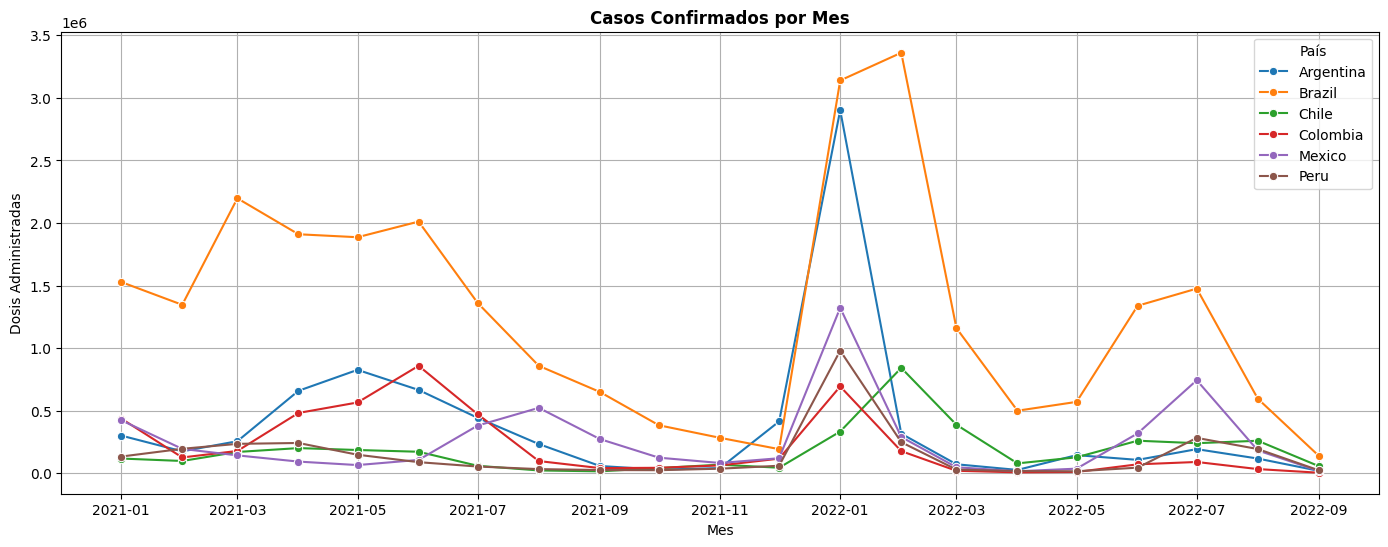

In [22]:
confirmed_per_month = df.groupby(['country_name', df['date'].dt.to_period('M')])['new_confirmed'].sum().reset_index()
confirmed_per_month['date'] = confirmed_per_month['date'].dt.to_timestamp()

plt.figure(figsize=(17, 6))
sns.lineplot(data=confirmed_per_month, x='date', y='new_confirmed', hue='country_name', marker='o')
'''
    data=confirmed_per_month: DataFrame de entrada
    x='date': Columna para el eje x
    y='new_confirmed': Columna para el eje y
    hue='country_name': Columna para el color de las líneas
    marker='o': Establece el marcador para los puntos de datos
'''

plt.title('Casos Confirmados por Mes', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')

plt.legend(title='País')
plt.grid(True)
plt.show()

#### Recuperados por mes 

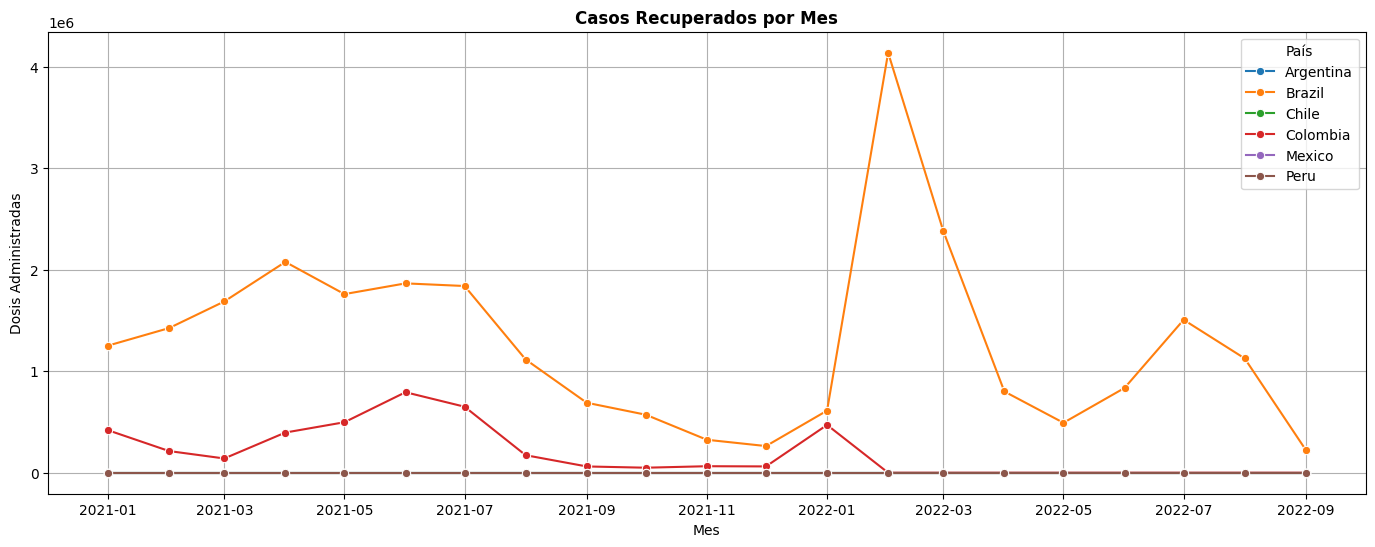

In [23]:
recovered_per_month = df.groupby(['country_name', df['date'].dt.to_period('M')])['new_recovered'].sum().reset_index()
recovered_per_month['date'] = recovered_per_month['date'].dt.to_timestamp()

plt.figure(figsize=(17, 6))
sns.lineplot(data=recovered_per_month, x='date', y='new_recovered', hue='country_name', marker='o')
'''
    data=recovered_per_month: DataFrame de entrada
    x='date': Columna para el eje x
    y='new_confirmed': Columna para el eje y
    hue='new_recovered': Columna para el color de las líneas
    marker='o': Establece el marcador para los puntos de datos
'''

plt.title('Casos Recuperados por Mes', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')

plt.legend(title='País')
plt.grid(True)
plt.show()

### Graficos de barras

#### Comparacion de nuevos casos entre paises

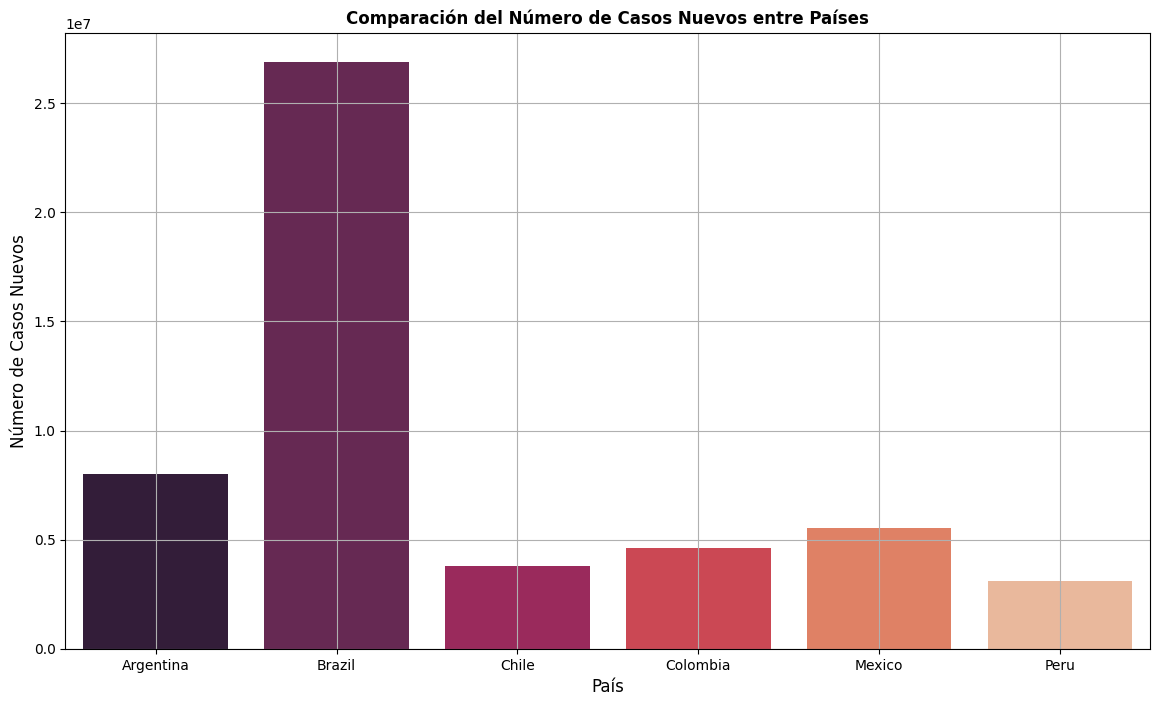

In [24]:
new_cases_by_country = df.groupby('country_name')['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=new_cases_by_country, x='country_name', y='new_confirmed', hue='country_name', dodge=False, palette='rocket', legend=False)
'''
    data=new_cases_by_country: DataFrame de entrada
    x='country_name': Columna para el eje x
    y='new_confirmed': Columna para el eje y
    hue='country_name': Columna para el color de las barras
    dodge=False: Agrupa las barras por país
    palette='rocket': Paleta de colores
    legend=False: No mostrar leyenda
'''

plt.title('Comparación del Número de Casos Nuevos entre Países', fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Casos Nuevos', fontsize=12)

plt.grid()
plt.show()

#### Dosis por pais

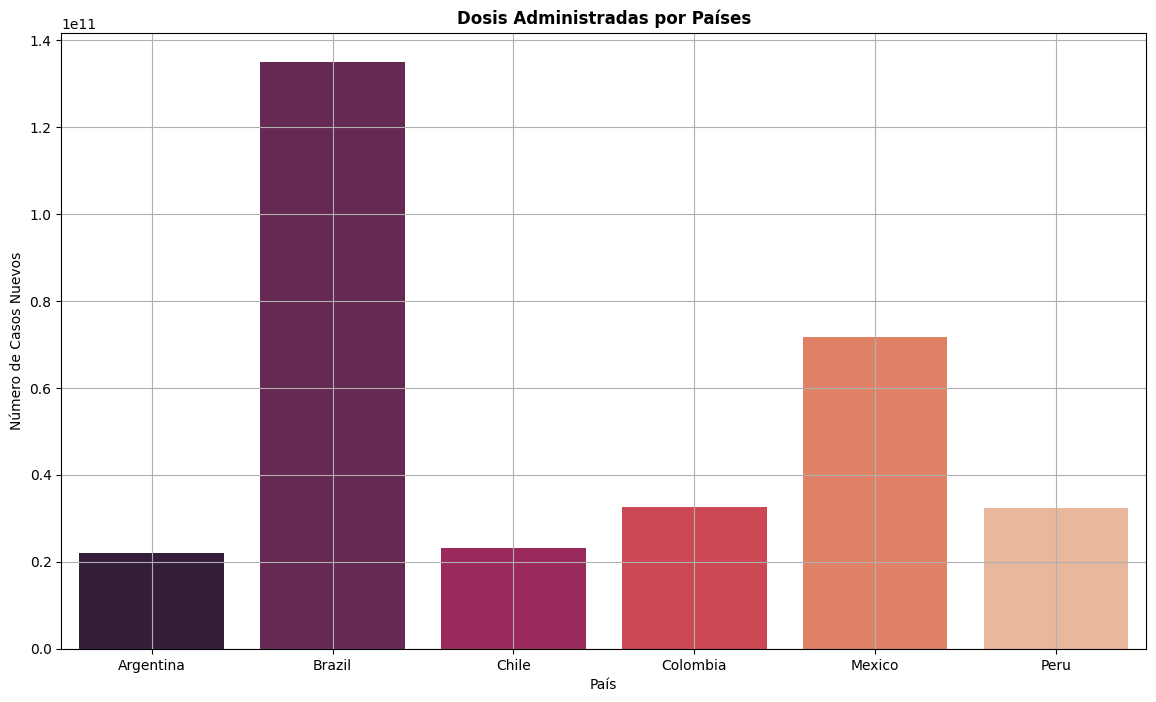

In [25]:
doses_administered_by_country = df.groupby('country_name')['cumulative_vaccine_doses_administered'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=doses_administered_by_country, x='country_name', y='cumulative_vaccine_doses_administered', hue='country_name', dodge=False, palette='rocket', legend=False)
'''
    data=doses_administered_by_country: DataFrame de entrada
    x='country_name': Columna para el eje x
    y='cumulative_vaccine_doses_administered': Columna para el eje y
    hue='country_name': Columna para el color de las barras
    dodge=False: Agrupa las barras por país
    palette='rocket': Paleta de colores
    legend=False: No mostrar leyenda
'''

plt.title('Dosis Administradas por Países', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Número de Casos Nuevos')

plt.grid()
plt.show()

### Diagrama de cajas de temperatura media de cada pais


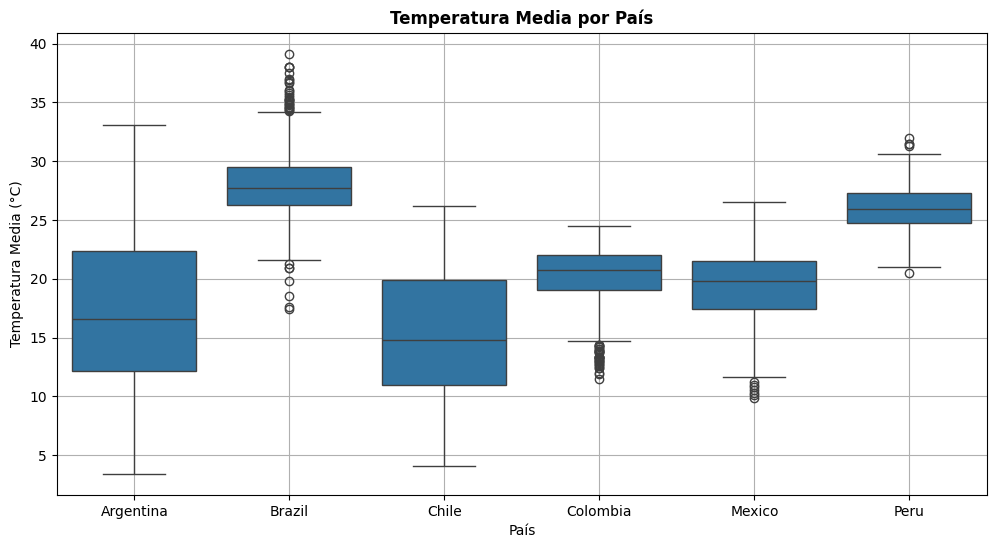

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='country_name', y='average_temperature_celsius')
'''
    data=df: DataFrame de entrada
    x='country_name': Columna para el eje x
    y='average_temperature_celsius': Columna para el eje y
'''

plt.title('Temperatura Media por País', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')

plt.grid(True)
plt.show()

#### Diagrama de Violin de Las variables que “Sí” tenga cambios de valores

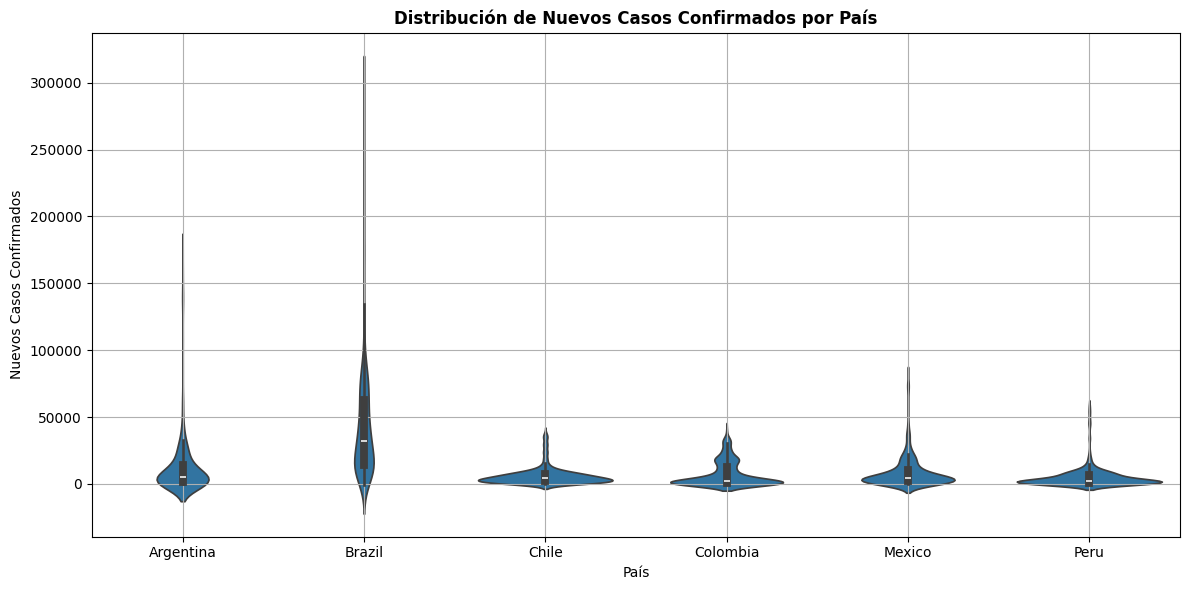

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='country_name', y='new_confirmed')
'''
    data=df: DataFrame de entrada
    x='country_name': Columna para el eje x
    y='new_confirmed': Columna para el eje y
'''

plt.title('Distribución de Nuevos Casos Confirmados por País', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Nuevos Casos Confirmados')

plt.tight_layout()
plt.grid(True)
plt.show()

### Grafico de barra, Distribucion de la poblacion por grupos de edad

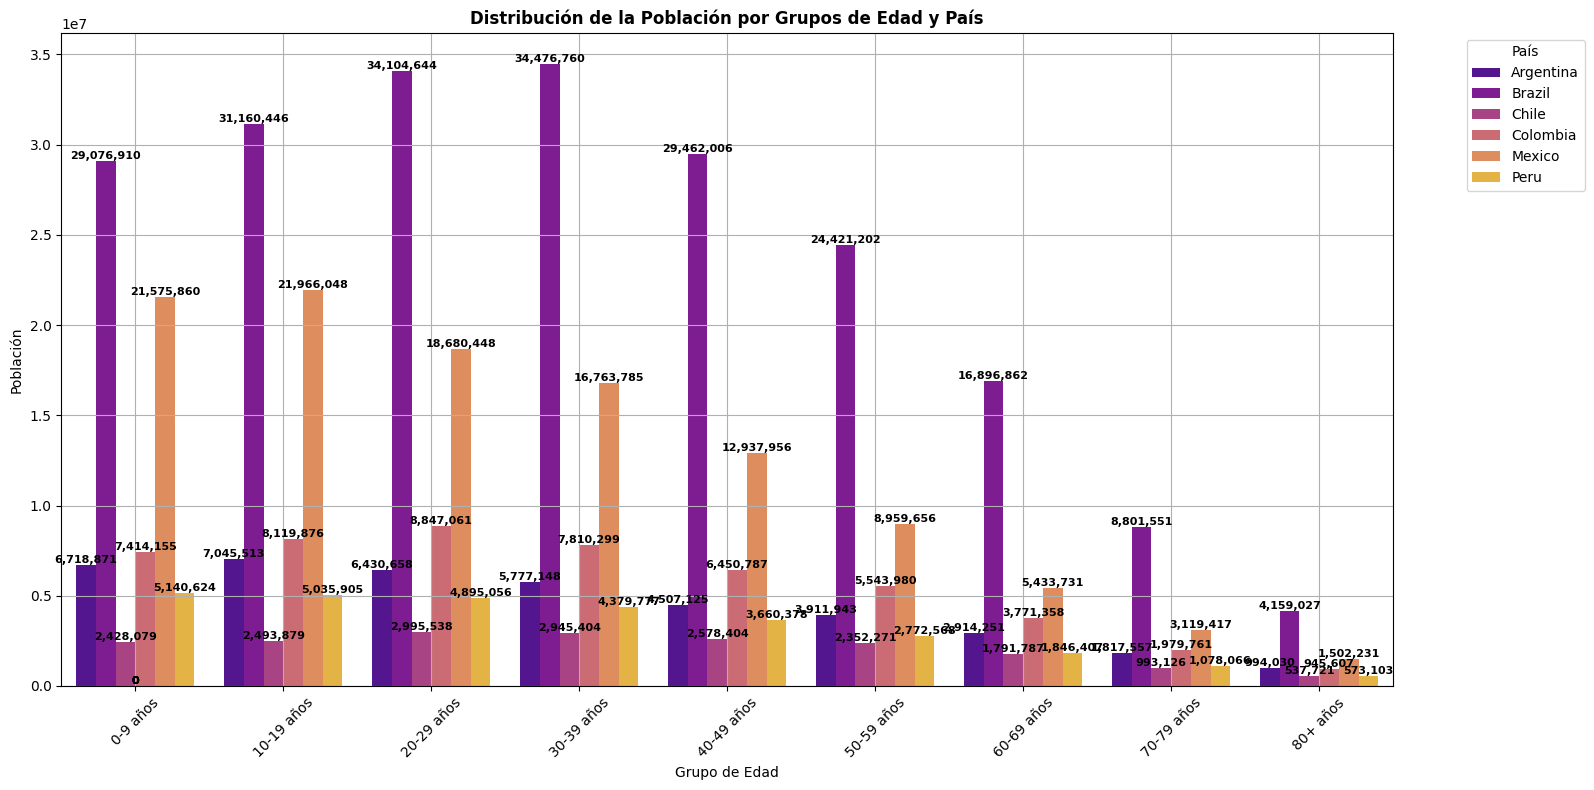

In [29]:
# Identificar las columnas relacionadas con la población por edad
age_columns = [col for col in df.columns if col.startswith('population_age')]

# Renombrar los grupos de edad en el eje x
rename_dict = {
    'population_age_00_09': '0-9 años',
    'population_age_10_19': '10-19 años',
    'population_age_20_29': '20-29 años',
    'population_age_30_39': '30-39 años',
    'population_age_40_49': '40-49 años',
    'population_age_50_59': '50-59 años',
    'population_age_60_69': '60-69 años',
    'population_age_70_79': '70-79 años',
    'population_age_80_and_older': '80+ años'
}

# Agrupar por país y seleccionar las columnas de edad
age_distribution = df.groupby('country_name')[age_columns].first().reset_index()

# Renombrar las columnas de edad
age_distribution = age_distribution.rename(columns=rename_dict)

# Transformar el DataFrame para que sea adecuado para graficar
age_distribution_melted = age_distribution.melt(id_vars='country_name', 
                                                 var_name='Grupo de Edad', 
                                                 value_name='Poblacion')

# Crear el gráfico
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=age_distribution_melted, 
                 x='Grupo de Edad', 
                 y='Poblacion', 
                 hue='country_name', 
                 palette='plasma')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Evitar errores con valores NaN
        ax.annotate(f'{int(height):,}',  # Formato de número con separador de miles
                    (p.get_x() + p.get_width() / 2., height),  # Posición de la etiqueta
                    ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')  # Estilo de la etiqueta

# Configurar el gráfico
plt.title('Distribución de la Población por Grupos de Edad y País', fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

####  Grafico de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

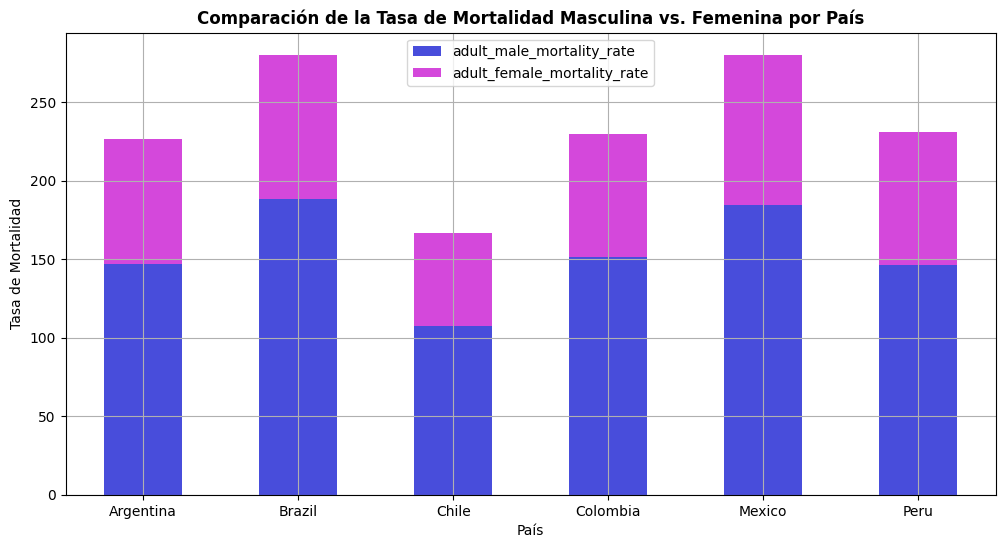

In [30]:
mortality_rates = df.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()
mortality_rates.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#484DDB', '#D448DB'])
'''
    kind='bar': Tipo de gráfico a utilizar
    stacked=True: Para que los valores se superpongan
    figsize=(12, 6): Tamaño de la figura
    color=['#D448DB', '#484DDB']: Colores de los valores
'''
plt.title('Comparación de la Tasa de Mortalidad Masculina vs. Femenina por País', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Avance 3

### Importación de las librerias a utilizar, archivo CSV y verificación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DatosFinalesFiltrados.csv', delimiter=';')

# Convertir la columna date a datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir las columnas float64 a tipo float32
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    df[col] = df[col].astype('float32')

df

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1616345.0
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1623946.0
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1628723.0
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1642519.0
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.519997,147.085999,79.483002,26.600000,15.8,0.0,1656444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,PE,2022-09-13,PE,Peru,1150.0,22.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3746,PE,2022-09-14,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3747,PE,2022-09-15,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0
3748,PE,2022-09-16,PE,Peru,0.0,0.0,4127612.0,216173.0,83624936.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.515999,146.369995,84.815002,63.900002,12.6,0.0,3911439.0


### Analisis Exploratorio

#### Evolucion de casos activos y nuevos confirmados

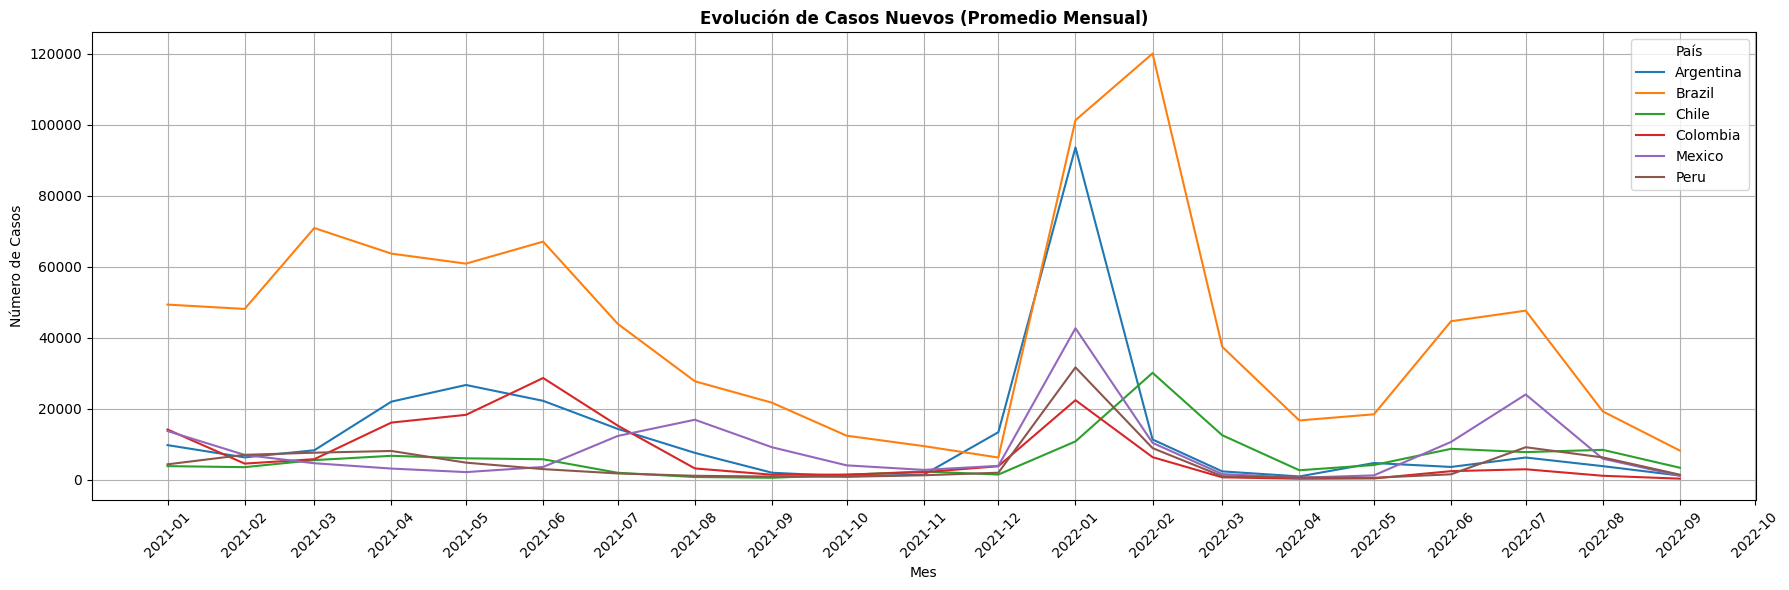

In [11]:
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df.groupby(['month', 'country_name'])['new_confirmed'].mean().reset_index()
plt.figure(figsize=(18, 6))

sns.lineplot(data=df_monthly, x='month', y='new_confirmed', hue='country_name')

plt.title('Evolución de Casos Nuevos (Promedio Mensual)', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Número de Casos')

# Formato de fechas
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.legend(title='País')
plt.grid(True)
plt.tight_layout()
plt.show()


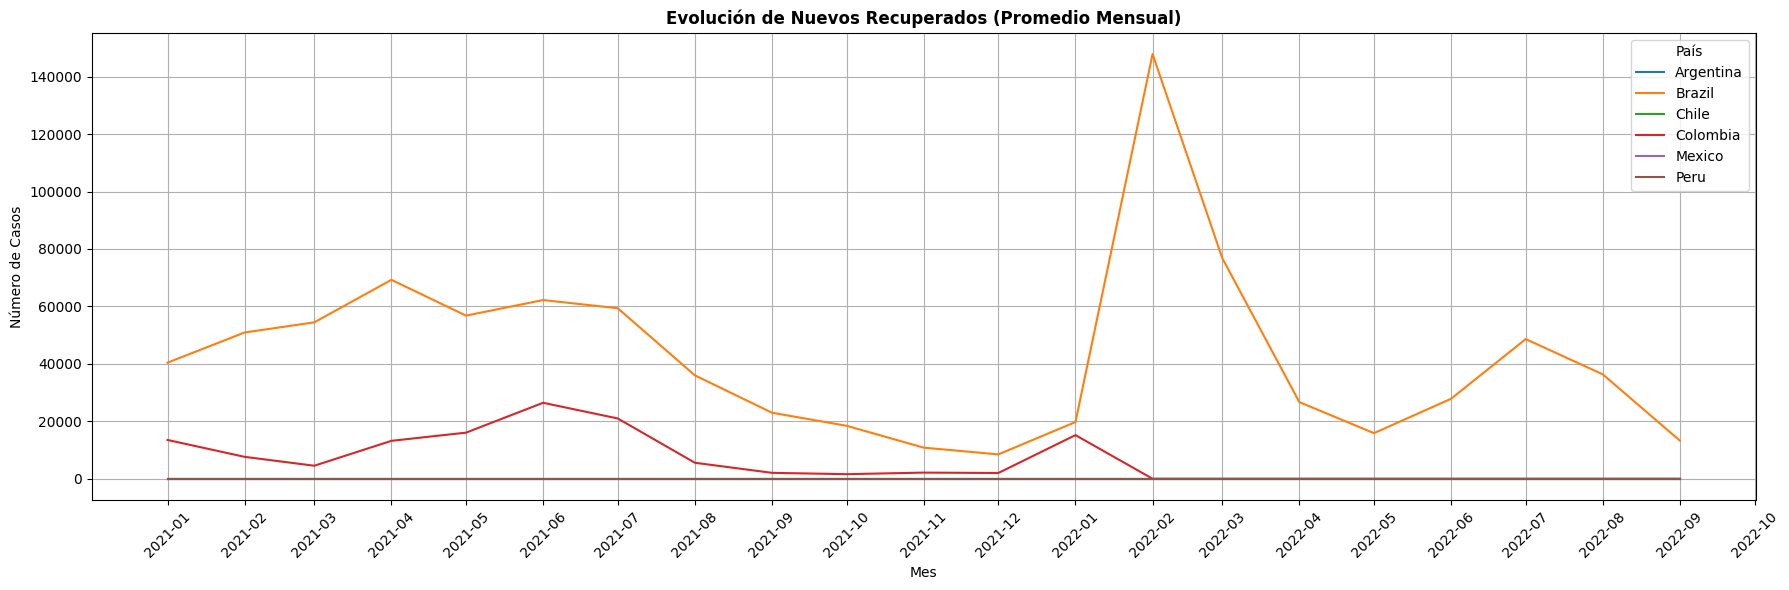

In [10]:
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df.groupby(['month', 'country_name'])['new_recovered'].mean().reset_index()
plt.figure(figsize=(18, 6))

sns.lineplot(data=df_monthly, x='month', y='new_recovered', hue='country_name')

plt.title('Evolución de Nuevos Recuperados (Promedio Mensual)', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Número de Casos')

# Formato de fechas
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.legend(title='País')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Relacion entre la Cobertura de vacunacion y la reduccion de casos

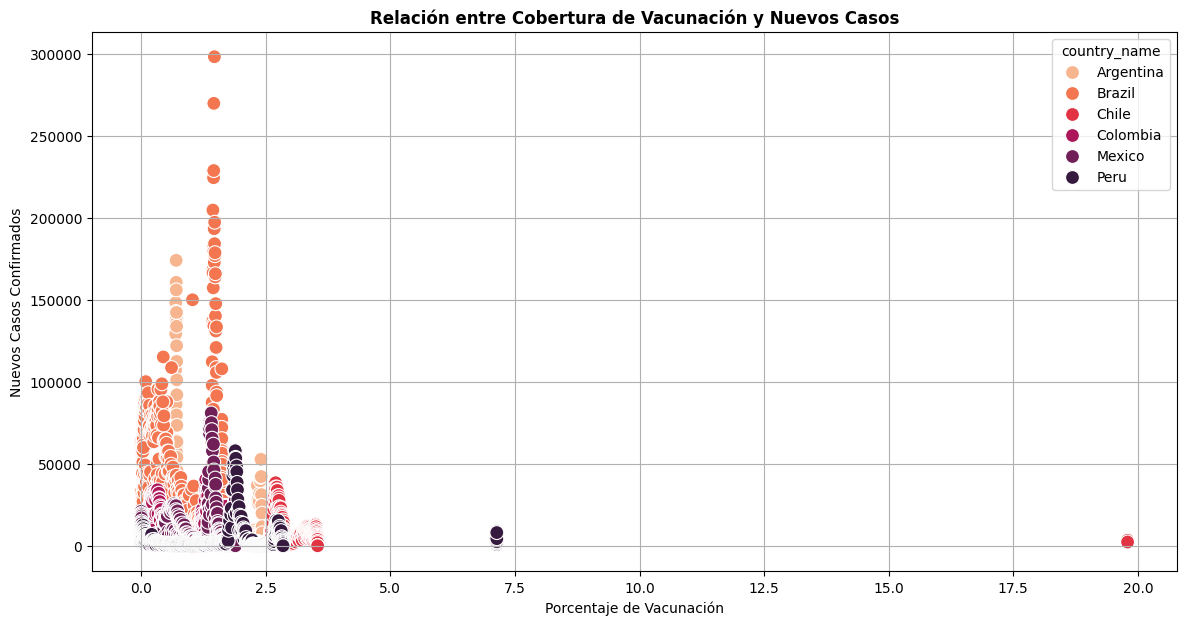

In [ ]:
df['porcentage_vacunacion'] = df['cumulative_vaccine_doses_administered'] / df['population']

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='porcentage_vacunacion', y='new_confirmed', hue='country_name', palette='rocket_r', s=100)

plt.title('Relación entre Cobertura de Vacunación y Nuevos Casos', fontweight='bold')
plt.xlabel('Porcentaje de Vacunación')
plt.ylabel('Nuevos Casos Confirmados')

plt.grid(True)
plt.show()

#### Nuevos casos y temperatura promedio

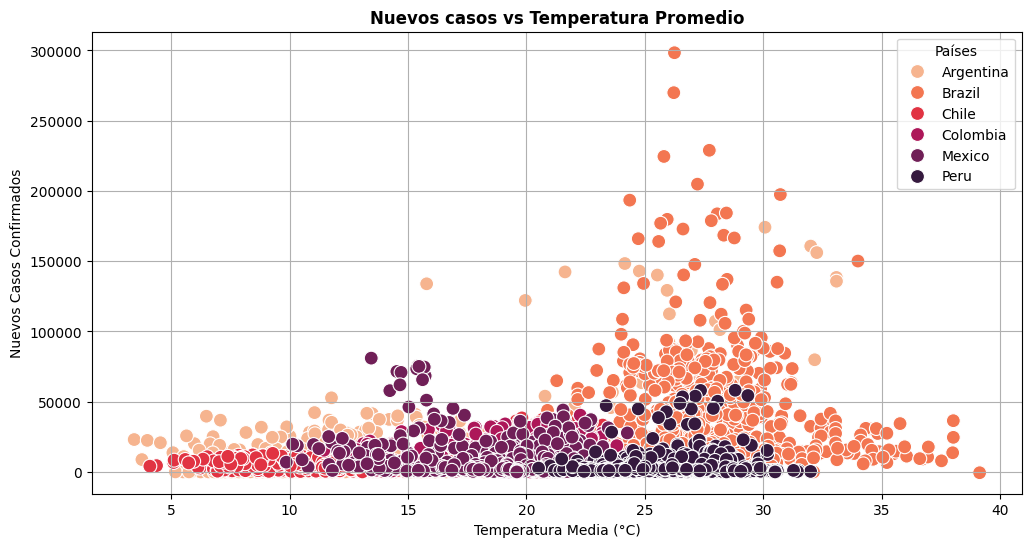

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='rocket_r', s=100)

plt.title('Nuevos casos vs Temperatura Promedio', fontweight='bold')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Casos Confirmados')

plt.legend(title='Países')
plt.grid(True)
plt.show()

### Evolucion semanal de casos nuevos

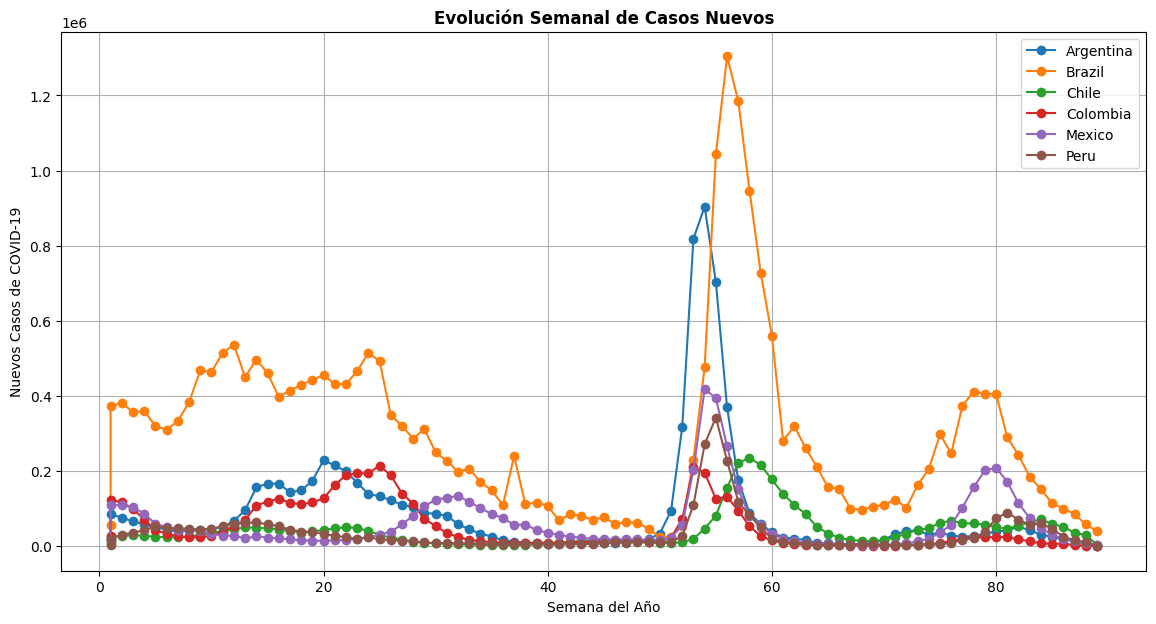

In [36]:
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.isocalendar().year

casos_semanales = df.groupby(['country_name', 'year', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))

for country in casos_semanales['country_name'].unique():
    country_casos_semanales = casos_semanales[casos_semanales['country_name'] == country]
    plt.plot(country_casos_semanales['week'] + (country_casos_semanales['year'] - 2021) * 52, country_casos_semanales['new_confirmed'], label=country, marker='o')

plt.title('Evolución Semanal de Casos Nuevos', fontweight='bold')
plt.xlabel('Semana del Año')
plt.ylabel('Nuevos Casos de COVID-19')

plt.legend()
plt.grid(True)
plt.show()

#### Evolucion anual de casos nuevos

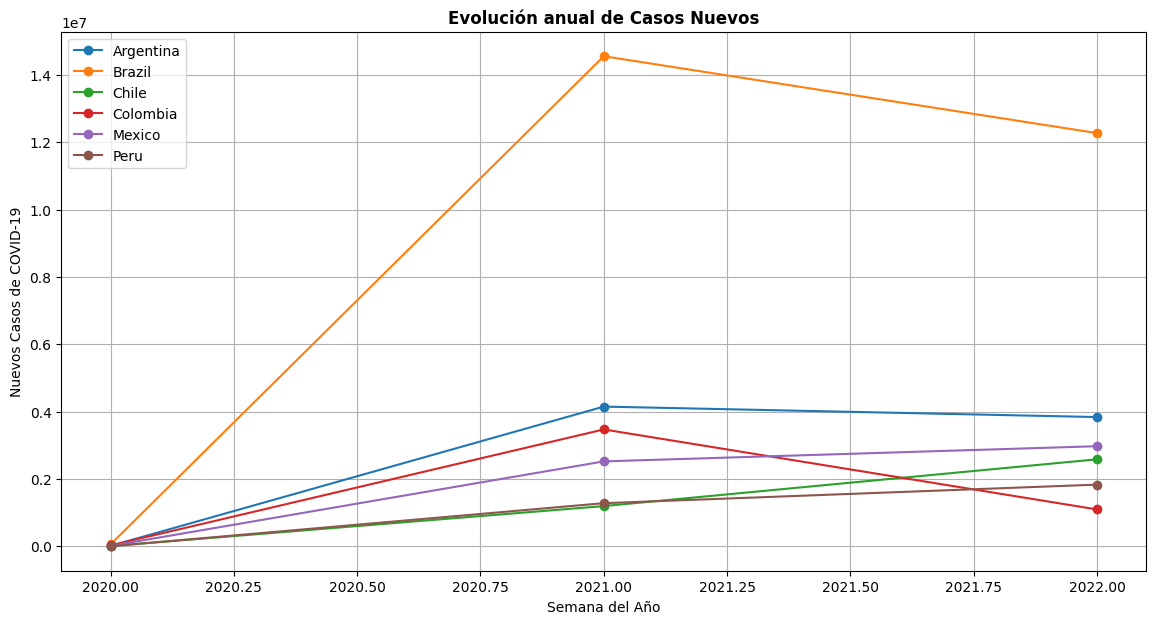

In [38]:
df['year'] = df['date'].dt.isocalendar().year

casos_anuales = df.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))

for country in casos_anuales['country_name'].unique():
    country_casos_anuales = casos_anuales[casos_anuales['country_name'] == country]
    plt.plot(country_casos_anuales['year'], country_casos_anuales['new_confirmed'], label=country, marker='o')

plt.title('Evolución anual de Casos Nuevos', fontweight='bold')
plt.xlabel('Semana del Año')
plt.ylabel('Nuevos Casos de COVID-19')

plt.legend()
plt.grid(True)
plt.show()

#### Distribución de la Población por Edad en Países

<Figure size 1600x1000 with 0 Axes>

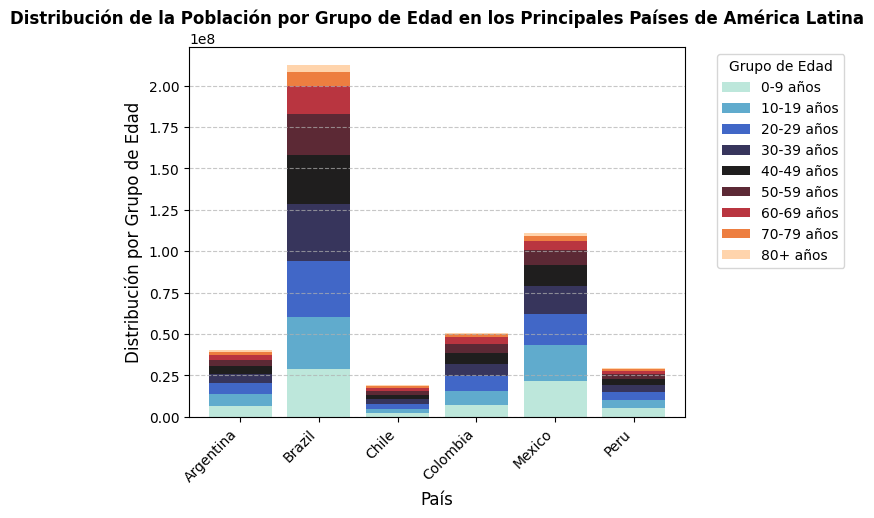

In [39]:
age_columns = [col for col in df.columns if col.startswith('population_age')]

if age_columns:
    rename_dict = {
        'population_age_00_09': '0-9 años',
        'population_age_10_19': '10-19 años',
        'population_age_20_29': '20-29 años',
        'population_age_30_39': '30-39 años',
        'population_age_40_49': '40-49 años',
        'population_age_50_59': '50-59 años',
        'population_age_60_69': '60-69 años',
        'population_age_70_79': '70-79 años',
        'population_age_80_and_older': '80+ años'
    }

    latest_data = df.groupby('country_name').last().reset_index()
    latest_data = latest_data.rename(columns=rename_dict)

    age_columns_renamed = [rename_dict.get(col, col) for col in age_columns]
    age_data = latest_data[['country_name'] + age_columns_renamed].set_index('country_name')

    plt.figure(figsize=(16, 10))
    age_data.head(6).plot(kind='bar', stacked=True, colormap='icefire', width=0.8)

    plt.title('Distribución de la Población por Grupo de Edad en los Principales Países de América Latina', fontweight='bold')
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Distribución por Grupo de Edad', fontsize=12)

    plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### Evolucion del numero de muertes diarias

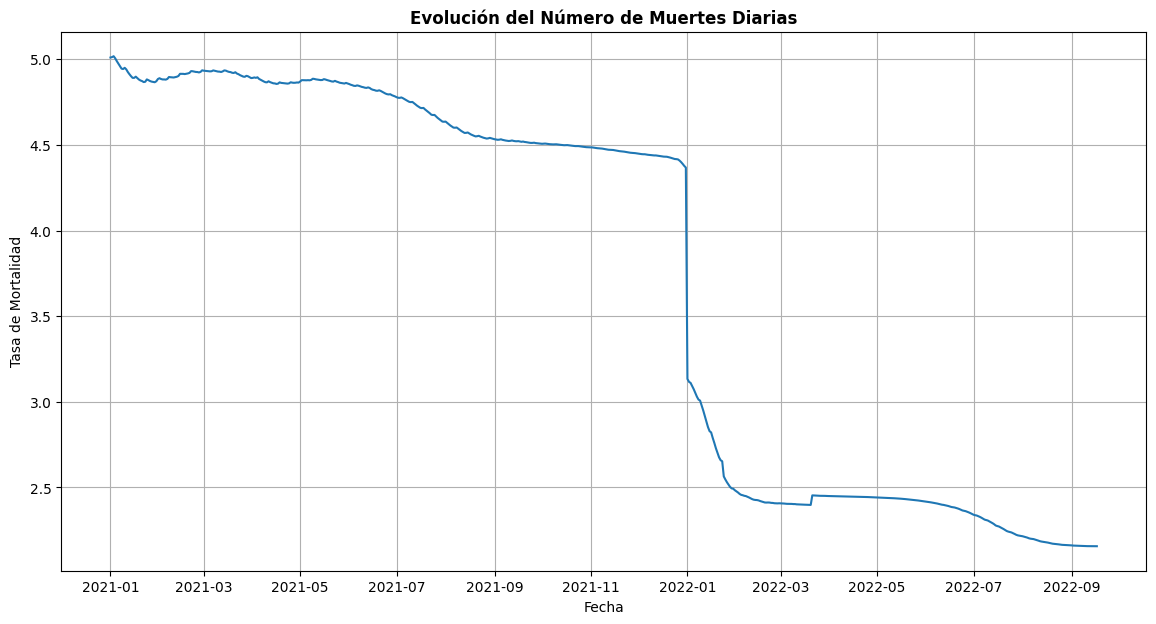

In [40]:
df['tasa_mortalidad'] = df['cumulative_deceased'] / df['cumulative_confirmed'] * 100

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='tasa_mortalidad', estimator='mean', errorbar=None)

plt.title('Evolución del Número de Muertes Diarias', fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')

plt.xticks()
plt.grid(True)
plt.show()

#### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

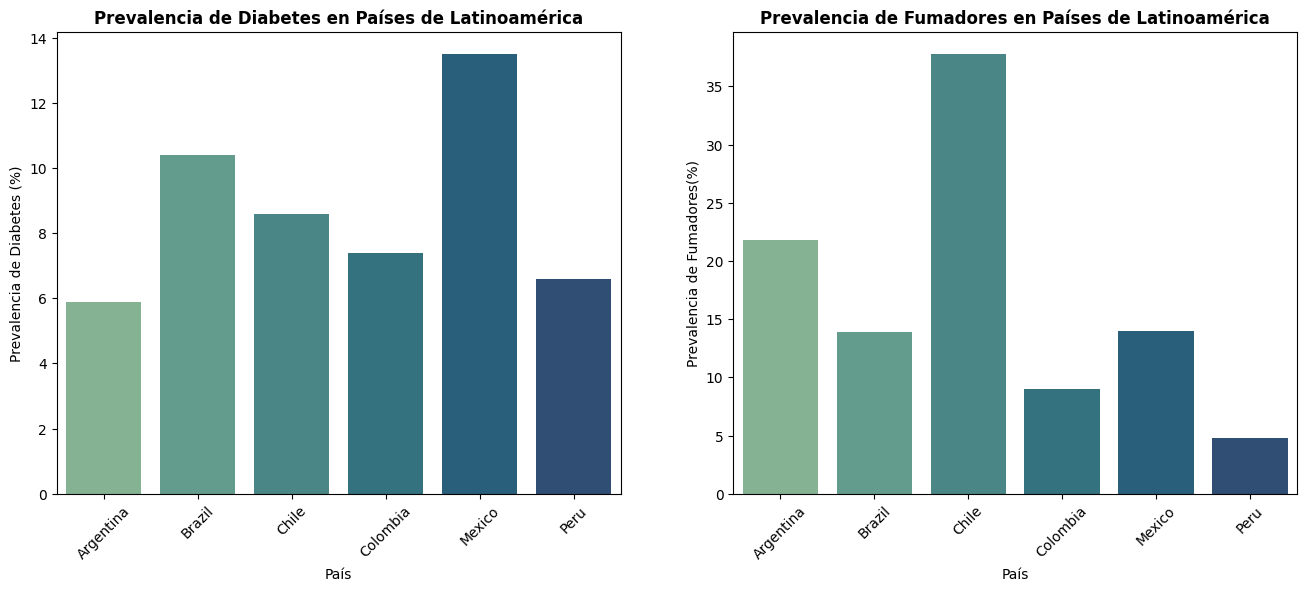

In [41]:
conditions_data = df[['country_name', 'diabetes_prevalence', 'smoking_prevalence']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', 
            hue='country_name', dodge=False, palette='crest', ax=axes[0])
axes[0].set_title('Prevalencia de Diabetes en Países de Latinoamérica', fontweight='bold')
axes[0].set_xlabel('País')
axes[0].set_ylabel('Prevalencia de Diabetes (%)')
axes[0].tick_params(axis='x', rotation=45)  

sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', 
            hue='country_name', dodge=False, palette='crest', ax=axes[1])
axes[1].set_title('Prevalencia de Fumadores en Países de Latinoamérica', fontweight='bold')
axes[1].set_xlabel('País')
axes[1].set_ylabel('Prevalencia de Fumadores(%)')
axes[1].tick_params(axis='x', rotation=45)  

plt.show()

## Extra Credit

In [43]:
import folium
from folium.plugins import HeatMap

columns=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','cumulative_recovered']
data_map = df[columns].dropna().astype(float)

#Creamos un mapa centrado en América Latina
map= folium.Map(location=[-14.235004,-51.92527], zoom_start=3)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creamos un mapa de calor para las muertes
heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered= HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map